In [96]:
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras import models, layers
import numpy as np
import collections
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K__O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
import pandas as pd 
df=pd.read_csv('tweets.csv')
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [65]:
df['text'] = df['text'].apply(lambda text: str(text))
df['sentiment'] = df['sentiment'].apply(lambda text: str(text))

In [66]:
df = df[['text', 'sentiment']]
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [67]:
def remove_stopwords(input_text):
    stopwords_list= stopwords.words('english')
    whitelist = ["n't", "not", "no"]
    words = input_text.split()
    clean_words= [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    return " ".join(clean_words)

In [68]:
def remove_mentions(input_text):
    return re.sub(r'@\w+','', input_text)

In [69]:
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)


C:\Users\K__O\AppData\Local\Temp\ipykernel_3700\1131679650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(remove_stopwords).apply(remove_mentions)


In [70]:
df

,text,sentiment
0,"I`d responded, going",neutral
1,Sooo SAD miss San Diego!!!,negative
2,boss bullying me...,negative
3,interview! leave alone,negative
4,"Sons ****, couldn`t put releases already bought",negative
...,...,...
27476,wish could come see Denver husband lost job ca...,negative
27477,I`ve wondered rake to. The client made clear ....,negative
27478,Yay good you. Enjoy break probably need hectic...,positive
27479,But worth ****.,positive


In [71]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.sentiment, test_size=0.1)
print("données d'apprentissage:", X_train.shape[0])
print("Données test", X_test.shape[0])
print("Données test y_test", y_test.shape[0])
print("données d'apprentissage y_train:", y_train.shape[0])
assert X_train.shape[0] == X_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

données d'apprentissage: 24732
Données test 2749
Données test y_test 2749
données d'apprentissage y_train: 24732


In [74]:
NB_WORDS = 10000
NB_START_EPOCHS = 20
BATCH_SIZE = 512
MAX_LEN = 20

In [75]:
tk = Tokenizer(num_words=NB_WORDS, 
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True, 
               char_level=False, 
               split=' ')
tk.fit_on_texts(X_train)
print('Ajustement du tokenizer sur {} documents'.format(tk.document_count))
print('{} mots du dictionnaire'.format(tk.num_words))
print('Top 5 mots les plus courants :', collections.Counter(tk.word_counts).most_common(5))
print(tk.word_index)

Ajustement du tokenizer sur 24732 documents
10000 mots du dictionnaire
Top 5 mots les plus courants : [('s', 3267), ('i', 3235), ('t', 2818), ('it', 2113), ('m', 2091)]
{'s': 1, 'i': 2, 't': 3, 'it': 4, 'm': 5, 'day': 6, 'not': 7, 'good': 8, 'you': 9, 'get': 10, 'like': 11, 'no': 12, 'go': 13, 'http': 14, 'love': 15, 'work': 16, 'today': 17, 'going': 18, 'got': 19, 'lol': 20, 'happy': 21, 'one': 22, 'time': 23, 'know': 24, 'really': 25, 'back': 26, 'com': 27, 'im': 28, 'don': 29, 'can': 30, 'that': 31, 'see': 32, 'night': 33, 'new': 34, 'want': 35, 'me': 36, 'home': 37, 'think': 38, 'well': 39, 'now': 40, 'still': 41, 'oh': 42, 'thanks': 43, 'll': 44, 'much': 45, 'my': 46, 'great': 47, 'hope': 48, 'the': 49, 'miss': 50, 'last': 51, 're': 52, 'need': 53, 'morning': 54, 'haha': 55, 'just': 56, 'fun': 57, 'twitter': 58, 'would': 59, 'feel': 60, 'tomorrow': 61, 'wish': 62, 'and': 63, 'so': 64, 'tonight': 65, 'but': 66, 'sad': 67, 'sorry': 68, 've': 69, 'bad': 70, 'right': 71, 'make': 72, '

In [79]:
X_train_new = tk.texts_to_matrix(X_train, mode='binary')
X_test_new = tk.texts_to_matrix(X_test, mode='binary')
X_test_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

negative------LabelEncode--> 0 ----To_cate----->[0,0,0]
neutral----LabelEncode---> 1 ----To_cate----->[1,0,0]
positive----LabelEncode---> 2 ----To_cate----->[2,0,0]


In [82]:
Encder = LabelEncoder()
y_train_enc = Encder.fit_transform(y_train)
y_test_enc = Encder.fit_transform(y_test)
y_train_oh = to_categorical(y_train_enc)
y_test_oh = to_categorical(y_test_enc)

print('"{} est convertit en {} "'.format(y_train[0], y_train_enc[0]))
print('"{} est convertit en {} "'.format(y_train_enc[0], y_train_oh[0]))



"neutral est convertit en 1 "
"1 est convertit en [0. 1. 0.] "


In [85]:
X_train_x, X_valid, y_train_y, y_valid = train_test_split(X_train_new, y_train_oh, test_size=0.1)
print(X_valid.shape[0], y_valid.shape[0])

assert X_train_x.shape[0] == y_train_y.shape[0]
assert X_valid.shape[0] == y_valid.shape[0]


2474 2474


In [100]:
model_0 = models.Sequential()
model_0.add(layers.Dense(64, activation='relu',input_shape=(NB_WORDS,)))
model_0.add(layers.Dense(64, activation='relu'))
model_0.add(layers.Dense(3, activation='softmax'))
model_0_name = 'Modéle de base'
model_0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640064    
                                                                 


 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [101]:
def deep_model(model, X_train, y_train, X_valid, y_valid): 
    model.compile(optimizer='rmsprop',
     loss='categorical_crossentropy',
      metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=NB_START_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=1)
    return history


In [102]:
histo_0 = deep_model(model_0, X_train_x, y_train_y, X_valid, y_valid)
histo_0

Epoch 1/20
44/44 [==============================] - 2s 36ms/step - loss: 0.9320 - accuracy: 0.5869 - val_loss: 0.7954 - val_accuracy: 0.6746
Epoch 2/20
44/44 [==============================] - 1s 25ms/step - loss: 0.6577 - accuracy: 0.7472 - val_loss: 0.7456 - val_accuracy: 0.6904
Epoch 3/20
44/44 [==============================] - 1s 26ms/step - loss: 0.5405 - accuracy: 0.7945 - val_loss: 0.7558 - val_accuracy: 0.6981
Epoch 4/20
44/44 [==============================] - 1s 26ms/step - loss: 0.4633 - accuracy: 0.8290 - val_loss: 0.7929 - val_accuracy: 0.6912
Epoch 5/20
44/44 [==============================] - 1s 27ms/step - loss: 0.3985 - accuracy: 0.8559 - val_loss: 0.8521 - val_accuracy: 0.6839
Epoch 6/20
44/44 [==============================] - 1s 27ms/step - loss: 0.3444 - accuracy: 0.8784 - val_loss: 0.8954 - val_accuracy: 0.6714
Epoch 7/20
44/44 [==============================] - 1s 26ms/step - loss: 0.2957 - accuracy: 0.8961 - val_loss: 0.9650 - val_accuracy: 0.6621
Epoch 8/20
44

In [103]:
def optimal_epoch(model_hist):
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Perte de validation minimale atteinte à l'époque {}".format(min_epoch))
    return min_epoch

In [104]:
Epo_opt= optimal_epoch(histo_0)

Perte de validation minimale atteinte à l'époque 2


In [105]:
def eval_metric(model, history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, NB_START_EPOCHS+1)

    plt.plot(e, metric, 'bo',label='Apprentissage'+metric_name)
    plt.plot(e, val_metric, 'b',label='Apprentissage'+metric_name)
    plt.xlabel('Epoch nnombre')
    plt.ylabel(metric_name)
    plt.title('Comparaison entre apprentissage et validation'+metric_name+'pour'+model.name)
    plt.legend()
    plt.show

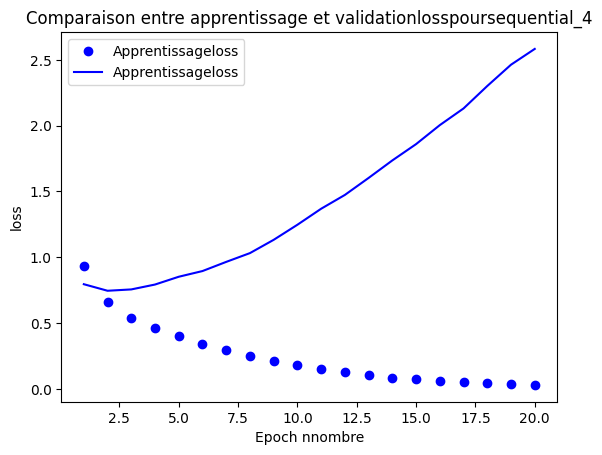

In [106]:
eval_metric(model_0, histo_0, 'loss')

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

c:\Users\K__O\anaconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [16]:
corpus = [
    "les rnn sont des reseaux de neurones",
    "les rnn traitent des donnees sequentielles",
    "les reseaux de neurones apprennent a predire",
    "les donnees sequentielles ont un ordre",
]

Tk = Tokenizer()
Tk.fit_on_texts(corpus)
total_words = len(Tk.word_index)+1
print(total_words)
print("\n vocabulaire", Tk.word_index)


17

 vocabulaire {'les': 1, 'rnn': 2, 'des': 3, 'reseaux': 4, 'de': 5, 'neurones': 6, 'donnees': 7, 'sequentielles': 8, 'sont': 9, 'traitent': 10, 'apprennent': 11, 'a': 12, 'predire': 13, 'ont': 14, 'un': 15, 'ordre': 16}


In [7]:
input_sequences = []
for line in corpus:
    token_list = Tk.texts_to_sequences([line])[0] 
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [8]:
max_seq = max([len(x) for x in input_sequences])
print(max_seq)

7


In [11]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq, padding='pre'))
input_sequences

array([[ 0,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  1,  2,  9],
       [ 0,  0,  0,  1,  2,  9,  3],
       [ 0,  0,  1,  2,  9,  3,  4],
       [ 0,  1,  2,  9,  3,  4,  5],
       [ 1,  2,  9,  3,  4,  5,  6],
       [ 0,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  1,  2, 10],
       [ 0,  0,  0,  1,  2, 10,  3],
       [ 0,  0,  1,  2, 10,  3,  7],
       [ 0,  1,  2, 10,  3,  7,  8],
       [ 0,  0,  0,  0,  0,  1,  4],
       [ 0,  0,  0,  0,  1,  4,  5],
       [ 0,  0,  0,  1,  4,  5,  6],
       [ 0,  0,  1,  4,  5,  6, 11],
       [ 0,  1,  4,  5,  6, 11, 12],
       [ 1,  4,  5,  6, 11, 12, 13],
       [ 0,  0,  0,  0,  0,  1,  7],
       [ 0,  0,  0,  0,  1,  7,  8],
       [ 0,  0,  0,  1,  7,  8, 14],
       [ 0,  0,  1,  7,  8, 14, 15],
       [ 0,  1,  7,  8, 14, 15, 16]])

In [14]:
X = input_sequences[:, :-1]

y = input_sequences[:, -1]

print(X[0], "\n", y[0])

[0 0 0 0 0 1] 
 2


In [17]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=total_words)
print(y)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.

In [18]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq-1))
model.add(SimpleRNN(64))
model.add(Dense(total_words, activation='softmax'))
